In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
%matplotlib inline

In [2]:
calls = pd.read_csv('./911_calls_for_service_clean_final.csv',index_col='callDateTime',parse_dates=True)

In [3]:
calls.resample('D').callNumber.count().sort_values(ascending=False).head()

callDateTime
2015-04-28    4441
2015-07-02    3514
2016-04-25    3500
2015-04-18    3498
2016-03-24    3496
Name: callNumber, dtype: int64

In [4]:
calls15 = calls['2015'].resample('D').count()
calls15['dayofyear'] = calls15.index.dayofyear
calls15.set_index('dayofyear',inplace=True)
calls16 = calls['2016'].resample('D').count()
calls16['dayofyear'] = calls16.index.dayofyear
calls16.set_index('dayofyear',inplace=True)

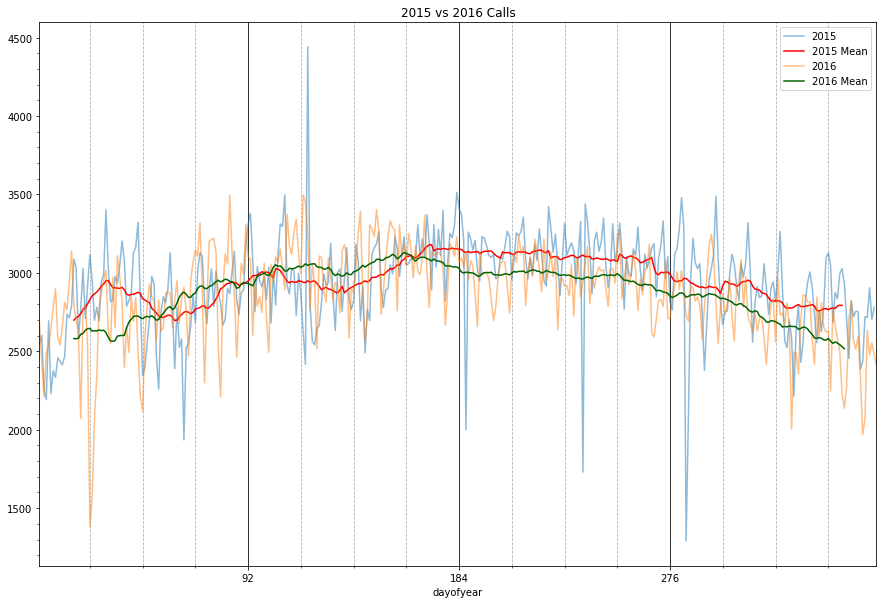

In [5]:
ax = calls15.priority.plot(x='dayofyear',figsize=(15,10), title="2015 vs 2016 Calls",label='2015',alpha=0.5)
c15_rMean = calls15.priority.rolling(window=30,center=True).mean() # Rolling Mean
ax.plot(c15_rMean, color='red',label='2015 Mean')

ax = calls16.priority.plot(figsize=(15,10), title="2015 vs 2016 Calls",label='2016',alpha=0.5)
c16_rMean = calls16.priority.rolling(window=30,center=True).mean() # Rolling Mean
ax.plot(c16_rMean, color='darkgreen',label='2016 Mean')
tick = round(366/4)
ax.xaxis.set_ticks([tick,2*tick,3*tick])
ax.grid('on',  axis='x', which = 'major',color='black')
ax.grid('on',  axis='x', which = 'minor',linestyle='--')
ax.minorticks_on()
ax.legend()

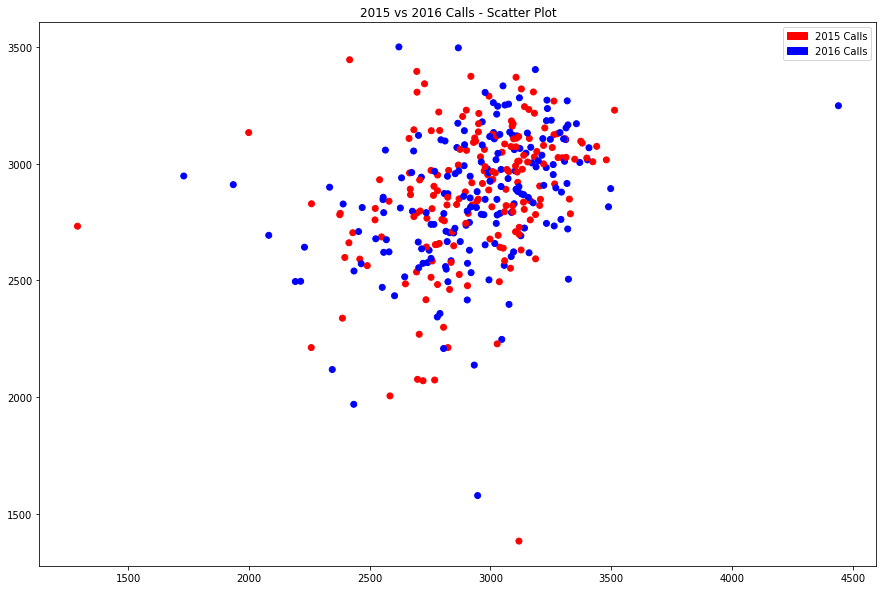

In [6]:
plt.figure(figsize=(15,10))
plt.scatter(calls15.priority,calls16.priority[:-1],c=['red','blue'])
plt.title('2015 vs 2016 Calls - Scatter Plot')

red_patch = mpatches.Patch(color='red', label='2015 Calls')
blue_patch = mpatches.Patch(color='blue', label='2016 Calls')

plt.legend(handles=[red_patch,blue_patch])